In [1]:
pip install urlextract

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import re
import urlextract
import xlrd


# For Preprocesssing Text Data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report

In [4]:
train = pd.read_excel(r"Reddit_Balenciaga.xlsx")

In [5]:
train.head(18)

,Comment ID,Parent ID,Author,Text,Score,Created,Likes
0,j2hj012,t3_100fxxj,CheburashkaOrange,I'm sorry I don't have anything conclusive but I recently watched this tiktok and I want to know what's up.\n\nhttps://preview.redd.it/uwblo89kzf9a1.png?width=1080&format=pjpg&auto=webp&v=enabled&s=ff06f21dc1ff3b03faabbe99b3a750e9c6a8f013,246,1672565369,NaN
1,j2hqkxd,t3_100fxxj,No_Kaleidoscope_9740,Wasnâ€™t there something about Miranda Kerr and Justin Bieber backstage at a VS show about 10 years ago which then perhaps led to an incident between Orlando bloom and Bieber later. I also think she didnâ€™t model for VS again after that.,241,1672572427,NaN
2,j2hmbxl,t3_100fxxj,Aurorials,Isabeli Fontana reveled in a podcast that Gisele and Adriana never got along that well as we thought!,197,1672568456,NaN
3,j2ig4u1,t3_100fxxj,batsheva_bxo,"Finally a story I can tell lol. My cousin works in fashion and previously worked for a designer who dressed Naomi Campbell for Cannes yeaaars ago. The designer was doing a fitting with her in her hotel room and Naomi suddenly wanted to change the length of the gown so her and a seamstress spent hours into the night opening the dress and doing the alteration on the spot and Naomi was sitting there bitching about them on the phone to random people and refusing to look at them when talking to them. ""Very annoying, but in situations like that what can you do"" is what she said lol.",288,1672588912,NaN
4,j2hpq98,t3_100fxxj,Lost_Information6121,I knew someone who claimed to go to the same gym as Adriana Lima in New York and she said that leading up to the victoria's secret fashion show (this was in 2016) Adriana was upset and crying all the time about her body not looking the same as it did before her children and being larger than the younger crop of VS models. Adriana was spending so much time at the gym she basically lived there. I hate the fashion industry and its standards for women's bodies!,960,1672571635,NaN
5,j2j2qry,t3_100fxxj,syrub,Wasn't there the rumour about Riccardo Tisci and K\*nye hooking up?,77,1672598516,NaN
6,j2jkwfs,t3_100fxxj,JulesOnFire,I worked with a designer who used to work at Reformation and apparently Yael Aflalo was really as bad as they say. Her nickname for my colleague was â€œbig titsâ€. Thatâ€™s straight up sexual harassment.,66,1672605509,NaN
7,j2j2ani,t3_100fxxj,IAmBoring_AMA,Alexander Wang has been accused of SA quite a few times over the years but nothing seems to stick and he always makes a comeback.,184,1672598339,NaN
8,j2jepg2,t3_100fxxj,cecebee13,thereâ€™s a doc series called kingdom of dreams that looks at the LVMH groupâ€™s growth and explored alexander mcqueen and john gallianoâ€™s careers as they rose (and fell) - highly recommend! x,62,1672603137,NaN
9,j2hjv7y,t3_100fxxj,Spiritual_Pen_2892,I'm still waiting to understand what happened with Magdalena Frackowiak,159,1672566166,NaN


In [6]:
train.shape[0]

35749

In [7]:
##Replace 'Text' column to 'Comments'

train.rename(columns = {'Text':'Comments'}, inplace = True)

In [8]:
train.columns

Index(['Comment ID', 'Parent ID', 'Author', 'Comments', 'Score', 'Created',
       'Likes'],
      dtype='object')

In [9]:
train[train.columns[-1]].count()

0

In [10]:
# Null rows detection

null_rows = train[train['Comments'].isnull()]

print(null_rows)

Empty DataFrame
Columns: [Comment ID, Parent ID, Author, Comments, Score, Created, Likes]
Index: []


In [11]:
# Drop rows with null values in 'Comments' column
train = train.dropna(subset=['Comments'])

In [12]:
train.shape

(35749, 7)

In [13]:
# Null rows detection

null_rows = train[train['Comments'].isnull()]

print(null_rows)

Empty DataFrame
Columns: [Comment ID, Parent ID, Author, Comments, Score, Created, Likes]
Index: []


In [14]:
train['Comments'] = train['Comments'].astype(str)

In [15]:
##train = train.sample(n=18000,replace=True)

In [16]:
train.shape

(35749, 7)

In [17]:
### Create Length Feature

train['text_length'] = train['Comments'].apply(lambda x : len(x))

<AxesSubplot:ylabel='Frequency'>

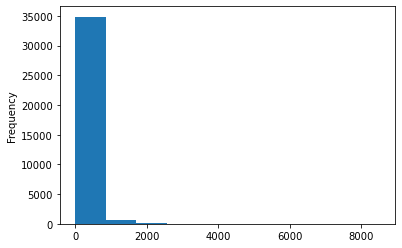

In [18]:
train['text_length'].plot.hist(bins = 10)

In [19]:
# URLs removal and extra spaces too

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'https?\S+', '', x).strip())

In [20]:
train.head(10)

,Comment ID,Parent ID,Author,Comments,Score,Created,Likes,text_length
0,j2hj012,t3_100fxxj,CheburashkaOrange,I'm sorry I don't have anything conclusive but I recently watched this tiktok and I want to know what's up.,246,1672565369,NaN,236
1,j2hqkxd,t3_100fxxj,No_Kaleidoscope_9740,Wasnâ€™t there something about Miranda Kerr and Justin Bieber backstage at a VS show about 10 years ago which then perhaps led to an incident between Orlando bloom and Bieber later. I also think she didnâ€™t model for VS again after that.,241,1672572427,NaN,238
2,j2hmbxl,t3_100fxxj,Aurorials,Isabeli Fontana reveled in a podcast that Gisele and Adriana never got along that well as we thought!,197,1672568456,NaN,102
3,j2ig4u1,t3_100fxxj,batsheva_bxo,"Finally a story I can tell lol. My cousin works in fashion and previously worked for a designer who dressed Naomi Campbell for Cannes yeaaars ago. The designer was doing a fitting with her in her hotel room and Naomi suddenly wanted to change the length of the gown so her and a seamstress spent hours into the night opening the dress and doing the alteration on the spot and Naomi was sitting there bitching about them on the phone to random people and refusing to look at them when talking to them. ""Very annoying, but in situations like that what can you do"" is what she said lol.",288,1672588912,NaN,583
4,j2hpq98,t3_100fxxj,Lost_Information6121,I knew someone who claimed to go to the same gym as Adriana Lima in New York and she said that leading up to the victoria's secret fashion show (this was in 2016) Adriana was upset and crying all the time about her body not looking the same as it did before her children and being larger than the younger crop of VS models. Adriana was spending so much time at the gym she basically lived there. I hate the fashion industry and its standards for women's bodies!,960,1672571635,NaN,461
5,j2j2qry,t3_100fxxj,syrub,Wasn't there the rumour about Riccardo Tisci and K\*nye hooking up?,77,1672598516,NaN,67
6,j2jkwfs,t3_100fxxj,JulesOnFire,I worked with a designer who used to work at Reformation and apparently Yael Aflalo was really as bad as they say. Her nickname for my colleague was â€œbig titsâ€. Thatâ€™s straight up sexual harassment.,66,1672605509,NaN,204
7,j2j2ani,t3_100fxxj,IAmBoring_AMA,Alexander Wang has been accused of SA quite a few times over the years but nothing seems to stick and he always makes a comeback.,184,1672598339,NaN,129
8,j2jepg2,t3_100fxxj,cecebee13,thereâ€™s a doc series called kingdom of dreams that looks at the LVMH groupâ€™s growth and explored alexander mcqueen and john gallianoâ€™s careers as they rose (and fell) - highly recommend! x,62,1672603137,NaN,194
9,j2hjv7y,t3_100fxxj,Spiritual_Pen_2892,I'm still waiting to understand what happened with Magdalena Frackowiak,159,1672566166,NaN,71


In [21]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [22]:
train['Comments'].apply(remove_punctuations)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Im sorry I dont have anything conclusive but I recently watched this tiktok and I want to know whats up
1                                                                                                                                                                                                                                                                                                                                                            Wasnâ€™t there something about Miranda Kerr and Justin Bieber bac

In [23]:
# Commit to Table
train['Comments'] = train['Comments'].apply(remove_punctuations)

<AxesSubplot:ylabel='Frequency'>

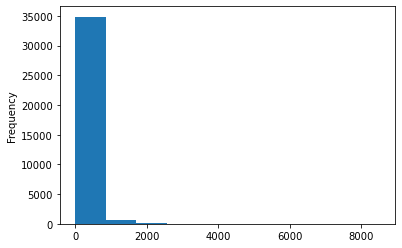

In [24]:
train['text_length'].plot.hist(bins = 10)

In [25]:
# Showing only
train['Comments'].apply(lambda x: x.lower())

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 im sorry i dont have anything conclusive but i recently watched this tiktok and i want to know whats up
1                                                                                                                                                                                                                                                                                                                                                            wasnâ€™t there something about miranda kerr and justin bieber bac

In [26]:
# Commit to Table
train['Comments'] = train['Comments'].apply(lambda x: x.lower())

In [27]:
import nltk
from nltk.tokenize import TweetTokenizer

# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
train['Tokens'] = train['Comments'].apply(tokenize_tweet)

In [28]:
train.head(20)

,Comment ID,Parent ID,Author,Comments,Score,Created,Likes,text_length,Tokens
0,j2hj012,t3_100fxxj,CheburashkaOrange,im sorry i dont have anything conclusive but i recently watched this tiktok and i want to know whats up,246,1672565369,NaN,236,"[im, sorry, i, dont, have, anything, conclusive, but, i, recently, watched, this, tiktok, and, i, want, to, know, whats, up]"
1,j2hqkxd,t3_100fxxj,No_Kaleidoscope_9740,wasnâ€™t there something about miranda kerr and justin bieber backstage at a vs show about 10 years ago which then perhaps led to an incident between orlando bloom and bieber later i also think she didnâ€™t model for vs again after that,241,1672572427,NaN,238,"[wasnâ, €, ™, t, there, something, about, miranda, kerr, and, justin, bieber, backstage, at, a, vs, show, about, 10, years, ago, which, then, perhaps, led, to, an, incident, between, orlando, bloom, and, bieber, later, i, also, think, she, didnâ, €, ™, t, model, for, vs, again, after, that]"
2,j2hmbxl,t3_100fxxj,Aurorials,isabeli fontana reveled in a podcast that gisele and adriana never got along that well as we thought,197,1672568456,NaN,102,"[isabeli, fontana, reveled, in, a, podcast, that, gisele, and, adriana, never, got, along, that, well, as, we, thought]"
3,j2ig4u1,t3_100fxxj,batsheva_bxo,finally a story i can tell lol my cousin works in fashion and previously worked for a designer who dressed naomi campbell for cannes yeaaars ago the designer was doing a fitting with her in her hotel room and naomi suddenly wanted to change the length of the gown so her and a seamstress spent hours into the night opening the dress and doing the alteration on the spot and naomi was sitting there bitching about them on the phone to random people and refusing to look at them when talking to them very annoying but in situations like that what can you do is what she said lol,288,1672588912,NaN,583,"[finally, a, story, i, can, tell, lol, my, cousin, works, in, fashion, and, previously, worked, for, a, designer, who, dressed, naomi, campbell, for, cannes, yeaaars, ago, the, designer, was, doing, a, fitting, with, her, in, her, hotel, room, and, naomi, suddenly, wanted, to, change, the, length, of, the, gown, so, her, and, a, seamstress, spent, hours, into, the, night, opening, the, dress, and, doing, the, alteration, on, the, spot, and, naomi, was, sitting, there, bitching, about, them, on, the, phone, to, random, people, and, refusing, to, look, at, them, when, talking, to, them, very, annoying, but, in, situations, like, that, ...]"
4,j2hpq98,t3_100fxxj,Lost_Information6121,i knew someone who claimed to go to the same gym as adriana lima in new york and she said that leading up to the victorias secret fashion show this was in 2016 adriana was upset and crying all the time about her body not looking the same as it did before her children and being larger than the younger crop of vs models adriana was spending so much time at the gym she basically lived there i hate the fashion industry and its standards for womens bodies,960,1672571635,NaN,461,"[i, knew, someone, who, claimed, to, go, to, the, same, gym, as, adriana, lima, in, new, york, and, she, said, that, leading, up, to, the, victorias, secret, fashion, show, this, was, in, 2016, adriana, was, upset, and, crying, all, the, time, about, her, body, not, looking, the, same, as, it, did, before, her, children, and, being, larger, than, the, younger, crop, of, vs, models, adriana, was, spending, so, much, time, at, the, gym, she, basically, lived, there, i, hate, the, fashion, industry, and, its, standards, for, womens, bodies]"
5,j2j2qry,t3_100fxxj,syrub,wasnt there the rumour about riccardo tisci and knye hooking up,77,1672598516,NaN,67,"[wasnt, there, the, rumour, about, riccardo, tisci, and, knye, hooking, up]"
6,j2jkwfs,t3_100fxxj,JulesOnFire,i worked with a designer who used to work at reformation and apparently yael aflalo was really as bad as they say her nickname for my colleague was â€œbig titsâ€ thatâ€™s straight up se

In [29]:
# Get Stopwords
stop = stopwords.words('english')

In [30]:
# Tokenize and Remove Stop Words
train['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                                                                                                                                                                       [im, sorry, dont, anything, conclusive, recently, watched, tiktok, want, know, whats]
1                                                                                                                                                                                                                          [wasnâ€™t, something, miranda, kerr, justin, bieber, backstage, vs, show, 10, years, ago, perhaps, led, incident, orlando, bloom, bieber, later, also, think, didnâ€™t, model, vs]
2                                                                                                                                                                                                           

In [31]:
train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0                                                                                                                                                                                                                                                                                  im sorry dont anything conclusive recently watched tiktok want know whats
1                                                                                                                                                                                                  wasnâ€™t something miranda kerr justin bieber backstage vs show 10 years ago perhaps led incident orlando bloom bieber later also think didnâ€™t model vs
2                                                                                                                                                                                                                                                                                isabeli fontana reveled podca

In [32]:
# Join the words back
train['Comments'] = train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [33]:
train.head(10)

,Comment ID,Parent ID,Author,Comments,Score,Created,Likes,text_length,Tokens
0,j2hj012,t3_100fxxj,CheburashkaOrange,im sorry dont anything conclusive recently watched tiktok want know whats,246,1672565369,NaN,236,"[im, sorry, i, dont, have, anything, conclusive, but, i, recently, watched, this, tiktok, and, i, want, to, know, whats, up]"
1,j2hqkxd,t3_100fxxj,No_Kaleidoscope_9740,wasnâ€™t something miranda kerr justin bieber backstage vs show 10 years ago perhaps led incident orlando bloom bieber later also think didnâ€™t model vs,241,1672572427,NaN,238,"[wasnâ, €, ™, t, there, something, about, miranda, kerr, and, justin, bieber, backstage, at, a, vs, show, about, 10, years, ago, which, then, perhaps, led, to, an, incident, between, orlando, bloom, and, bieber, later, i, also, think, she, didnâ, €, ™, t, model, for, vs, again, after, that]"
2,j2hmbxl,t3_100fxxj,Aurorials,isabeli fontana reveled podcast gisele adriana never got along well thought,197,1672568456,NaN,102,"[isabeli, fontana, reveled, in, a, podcast, that, gisele, and, adriana, never, got, along, that, well, as, we, thought]"
3,j2ig4u1,t3_100fxxj,batsheva_bxo,finally story tell lol cousin works fashion previously worked designer dressed naomi campbell cannes yeaaars ago designer fitting hotel room naomi suddenly wanted change length gown seamstress spent hours night opening dress alteration spot naomi sitting bitching phone random people refusing look talking annoying situations like said lol,288,1672588912,NaN,583,"[finally, a, story, i, can, tell, lol, my, cousin, works, in, fashion, and, previously, worked, for, a, designer, who, dressed, naomi, campbell, for, cannes, yeaaars, ago, the, designer, was, doing, a, fitting, with, her, in, her, hotel, room, and, naomi, suddenly, wanted, to, change, the, length, of, the, gown, so, her, and, a, seamstress, spent, hours, into, the, night, opening, the, dress, and, doing, the, alteration, on, the, spot, and, naomi, was, sitting, there, bitching, about, them, on, the, phone, to, random, people, and, refusing, to, look, at, them, when, talking, to, them, very, annoying, but, in, situations, like, that, ...]"
4,j2hpq98,t3_100fxxj,Lost_Information6121,knew someone claimed go gym adriana lima new york said leading victorias secret fashion show 2016 adriana upset crying time body looking children larger younger crop vs models adriana spending much time gym basically lived hate fashion industry standards womens bodies,960,1672571635,NaN,461,"[i, knew, someone, who, claimed, to, go, to, the, same, gym, as, adriana, lima, in, new, york, and, she, said, that, leading, up, to, the, victorias, secret, fashion, show, this, was, in, 2016, adriana, was, upset, and, crying, all, the, time, about, her, body, not, looking, the, same, as, it, did, before, her, children, and, being, larger, than, the, younger, crop, of, vs, models, adriana, was, spending, so, much, time, at, the, gym, she, basically, lived, there, i, hate, the, fashion, industry, and, its, standards, for, womens, bodies]"
5,j2j2qry,t3_100fxxj,syrub,wasnt rumour riccardo tisci knye hooking,77,1672598516,NaN,67,"[wasnt, there, the, rumour, about, riccardo, tisci, and, knye, hooking, up]"
6,j2jkwfs,t3_100fxxj,JulesOnFire,worked designer used work reformation apparently yael aflalo really bad say nickname colleague â€œbig titsâ€ thatâ€™s straight sexual harassment,66,1672605509,NaN,204,"[i, worked, with, a, designer, who, used, to, work, at, reformation, and, apparently, yael, aflalo, was, really, as, bad, as, they, say, her, nickname, for, my, colleague, was, â, €, œbig, titsâ, €, , thatâ, €, ™, s, straight, up, sexual, harassment]"
7,j2j2ani,t3_100fxxj,IAmBoring_AMA,alexander wang accused sa quite times years nothing seems stick always makes comeback,184,1672598339,NaN,129,"[alexander, wang, has, been, accused, of, sa, quite, a, few, times, over, the, years, but, nothing, seems, to, stick, and, he, always, makes, a, comeback]"
8,j2jepg2,t3_100fxxj,cecebee13,thereâ€™s doc se

In [34]:
##Remove characters other than emoticons

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\u2764"                  # heart symbol
        u"\U0001F644"              # rolling eyes face
        u"\U000024C2-\U0001F251"  # miscellaneous symbols
        u"\U0001f926-\U0001f937"  # people and body-related symbols
        u"\u2600-\u2B55"          # weather-related symbols
        u"\u200d"                 # zero width joiner
        u"\u23cf"                 # eject symbol
        u"\u23e9"                 # fast forward symbol
        u"\u231a"                 # watch symbol
        u"\ufe0f"                 # emoji variation selector
                                  
                           "]+", flags=re.UNICODE)
    text = emoticon_pattern.sub(r' ', text)  # replace emoticons with a space
    text = re.sub(r'[^\w\s]', '', text)  # remove non-word characters except spaces
    return text.strip()

In [35]:

# Apply the remove_emoticons function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_emoticons)

In [36]:
##Remove numbers

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'\d+', '', x))

In [37]:
train.head(500)

,Comment ID,Parent ID,Author,Comments,Score,Created,Likes,text_length,Tokens
0,j2hj012,t3_100fxxj,CheburashkaOrange,im sorry dont anything conclusive recently watched tiktok want know whats,246,1672565369,NaN,236,"[im, sorry, i, dont, have, anything, conclusive, but, i, recently, watched, this, tiktok, and, i, want, to, know, whats, up]"
1,j2hqkxd,t3_100fxxj,No_Kaleidoscope_9740,wasnât something miranda kerr justin bieber backstage vs show years ago perhaps led incident orlando bloom bieber later also think didnât model vs,241,1672572427,NaN,238,"[wasnâ, €, ™, t, there, something, about, miranda, kerr, and, justin, bieber, backstage, at, a, vs, show, about, 10, years, ago, which, then, perhaps, led, to, an, incident, between, orlando, bloom, and, bieber, later, i, also, think, she, didnâ, €, ™, t, model, for, vs, again, after, that]"
2,j2hmbxl,t3_100fxxj,Aurorials,isabeli fontana reveled podcast gisele adriana never got along well thought,197,1672568456,NaN,102,"[isabeli, fontana, reveled, in, a, podcast, that, gisele, and, adriana, never, got, along, that, well, as, we, thought]"
3,j2ig4u1,t3_100fxxj,batsheva_bxo,finally story tell lol cousin works fashion previously worked designer dressed naomi campbell cannes yeaaars ago designer fitting hotel room naomi suddenly wanted change length gown seamstress spent hours night opening dress alteration spot naomi sitting bitching phone random people refusing look talking annoying situations like said lol,288,1672588912,NaN,583,"[finally, a, story, i, can, tell, lol, my, cousin, works, in, fashion, and, previously, worked, for, a, designer, who, dressed, naomi, campbell, for, cannes, yeaaars, ago, the, designer, was, doing, a, fitting, with, her, in, her, hotel, room, and, naomi, suddenly, wanted, to, change, the, length, of, the, gown, so, her, and, a, seamstress, spent, hours, into, the, night, opening, the, dress, and, doing, the, alteration, on, the, spot, and, naomi, was, sitting, there, bitching, about, them, on, the, phone, to, random, people, and, refusing, to, look, at, them, when, talking, to, them, very, annoying, but, in, situations, like, that, ...]"
4,j2hpq98,t3_100fxxj,Lost_Information6121,knew someone claimed go gym adriana lima new york said leading victorias secret fashion show adriana upset crying time body looking children larger younger crop vs models adriana spending much time gym basically lived hate fashion industry standards womens bodies,960,1672571635,NaN,461,"[i, knew, someone, who, claimed, to, go, to, the, same, gym, as, adriana, lima, in, new, york, and, she, said, that, leading, up, to, the, victorias, secret, fashion, show, this, was, in, 2016, adriana, was, upset, and, crying, all, the, time, about, her, body, not, looking, the, same, as, it, did, before, her, children, and, being, larger, than, the, younger, crop, of, vs, models, adriana, was, spending, so, much, time, at, the, gym, she, basically, lived, there, i, hate, the, fashion, industry, and, its, standards, for, womens, bodies]"
...,...,...,...,...,...,...,...,...,...
495,j4ejlv2,t1_j4dluwi,CowboyRetr0,oh shii donât think one,0,1673754120,NaN,34,"[oh, shii, i, donâ, €, ™, t, think, i, have, one]"
496,j4l7m17,t1_j4ha26o,CowboyRetr0,thank,2,1673879899,NaN,9,"[thank, you]"
497,j4l7kip,t1_j4ia7zu,CowboyRetr0,get,1,1673879881,NaN,23,"[will, do, when, i, get, them]"
498,j4ebtua,t1_j4dlr0s,CowboyRetr0,bro calling zoomer ight ok tf want wit wife kids head ass,8,1673750494,NaN,93,"[bro, calling, me, a, zoomer, ight, ok, tf, you, want, me, to, do, with, your, 30, wit, wife, and, kids, head, ass]"


In [38]:
##Remove non-ASCII improperly encoded characters

def remove_invalid_chars(text):
    # encode the text string using ASCII encoding
    encoded_text = text.encode('ascii', 'ignore')
    # decode the encoded text using ASCII encoding
    decoded_text = encoded_text.decode('ascii')
    return decoded_text

In [39]:
# apply the remove_invalid_chars function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_invalid_chars)


In [40]:
train.head(20)

,Comment ID,Parent ID,Author,Comments,Score,Created,Likes,text_length,Tokens
0,j2hj012,t3_100fxxj,CheburashkaOrange,im sorry dont anything conclusive recently watched tiktok want know whats,246,1672565369,NaN,236,"[im, sorry, i, dont, have, anything, conclusive, but, i, recently, watched, this, tiktok, and, i, want, to, know, whats, up]"
1,j2hqkxd,t3_100fxxj,No_Kaleidoscope_9740,wasnt something miranda kerr justin bieber backstage vs show years ago perhaps led incident orlando bloom bieber later also think didnt model vs,241,1672572427,NaN,238,"[wasnâ, €, ™, t, there, something, about, miranda, kerr, and, justin, bieber, backstage, at, a, vs, show, about, 10, years, ago, which, then, perhaps, led, to, an, incident, between, orlando, bloom, and, bieber, later, i, also, think, she, didnâ, €, ™, t, model, for, vs, again, after, that]"
2,j2hmbxl,t3_100fxxj,Aurorials,isabeli fontana reveled podcast gisele adriana never got along well thought,197,1672568456,NaN,102,"[isabeli, fontana, reveled, in, a, podcast, that, gisele, and, adriana, never, got, along, that, well, as, we, thought]"
3,j2ig4u1,t3_100fxxj,batsheva_bxo,finally story tell lol cousin works fashion previously worked designer dressed naomi campbell cannes yeaaars ago designer fitting hotel room naomi suddenly wanted change length gown seamstress spent hours night opening dress alteration spot naomi sitting bitching phone random people refusing look talking annoying situations like said lol,288,1672588912,NaN,583,"[finally, a, story, i, can, tell, lol, my, cousin, works, in, fashion, and, previously, worked, for, a, designer, who, dressed, naomi, campbell, for, cannes, yeaaars, ago, the, designer, was, doing, a, fitting, with, her, in, her, hotel, room, and, naomi, suddenly, wanted, to, change, the, length, of, the, gown, so, her, and, a, seamstress, spent, hours, into, the, night, opening, the, dress, and, doing, the, alteration, on, the, spot, and, naomi, was, sitting, there, bitching, about, them, on, the, phone, to, random, people, and, refusing, to, look, at, them, when, talking, to, them, very, annoying, but, in, situations, like, that, ...]"
4,j2hpq98,t3_100fxxj,Lost_Information6121,knew someone claimed go gym adriana lima new york said leading victorias secret fashion show adriana upset crying time body looking children larger younger crop vs models adriana spending much time gym basically lived hate fashion industry standards womens bodies,960,1672571635,NaN,461,"[i, knew, someone, who, claimed, to, go, to, the, same, gym, as, adriana, lima, in, new, york, and, she, said, that, leading, up, to, the, victorias, secret, fashion, show, this, was, in, 2016, adriana, was, upset, and, crying, all, the, time, about, her, body, not, looking, the, same, as, it, did, before, her, children, and, being, larger, than, the, younger, crop, of, vs, models, adriana, was, spending, so, much, time, at, the, gym, she, basically, lived, there, i, hate, the, fashion, industry, and, its, standards, for, womens, bodies]"
5,j2j2qry,t3_100fxxj,syrub,wasnt rumour riccardo tisci knye hooking,77,1672598516,NaN,67,"[wasnt, there, the, rumour, about, riccardo, tisci, and, knye, hooking, up]"
6,j2jkwfs,t3_100fxxj,JulesOnFire,worked designer used work reformation apparently yael aflalo really bad say nickname colleague big tits thats straight sexual harassment,66,1672605509,NaN,204,"[i, worked, with, a, designer, who, used, to, work, at, reformation, and, apparently, yael, aflalo, was, really, as, bad, as, they, say, her, nickname, for, my, colleague, was, â, €, œbig, titsâ, €, , thatâ, €, ™, s, straight, up, sexual, harassment]"
7,j2j2ani,t3_100fxxj,IAmBoring_AMA,alexander wang accused sa quite times years nothing seems stick always makes comeback,184,1672598339,NaN,129,"[alexander, wang, has, been, accused, of, sa, quite, a, few, times, over, the, years, but, nothing, seems, to, stick, and, he, always, makes, a, comeback]"
8,j2jepg2,t3_100fxxj,cecebee13,theres doc series called kingdom dreams

In [41]:
!pip install nltk

In [42]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [45]:
nltk.download('omw-1.4')

# Lemmatize
train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                                                                                                                                                                                                                                                                  im sorry dont anything conclusive recently watched tiktok want know whats
1                                                                                                                                                                                                          wasnt something miranda kerr justin bieber backstage vs show  years ago perhaps led incident orlando bloom bieber later also think didnt model vs
2                                                                                                                                                                                                                                                                                isabeli fontana reveled podca

In [46]:
# Commit to Table

train['Comments'] = train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [47]:
# Download the required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [48]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [49]:
# Apply the POS tagging function to the 'Comments' column
train['POS_Tagged'] = train['Comments'].apply(pos_tagging)

In [50]:
train['POS_Tagged']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [(im, NN), (sorry, NN), (dont, NN), (anything, NN), (conclusive, JJ), (recently, RB), (watched, VBD), (tiktok, NN), (want, NN), (know, VBP), (whats, NNS)]
1                                                                                                                                                                                                                                                                                                    

In [51]:
!pip install textblob

In [52]:
import pandas as pd
from textblob import TextBlob
import gensim.downloader as api

In [53]:
import gensim.downloader as api

# Load the GloVe model
glove_model = api.load('glove-wiki-gigaword-100')

import re

def clean_text(text):
    text = str(text)
    # Remove any URLs
    text = re.sub(r'http\S+', '', text)
    # Remove any user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove any non-word character and extra whitespaces
    text = re.sub(r'[^\w\s]', '', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

train['cleaned_comments'] = train['Comments'].apply(clean_text)

In [54]:
# Clean the comments
train['cleaned_comments'] = train['Comments'].apply(clean_text)

In [55]:
# Create word embeddings for each comment
def create_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in glove_model:
            embeddings.append(glove_model[word])
    return embeddings

train['embeddings'] = train['cleaned_comments'].apply(create_embeddings)

In [56]:
# Calculate the sentiment score for each comment
def calculate_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

train['sentiment_score'] = train['cleaned_comments'].apply(calculate_sentiment_score)

In [57]:
# Calculate the polarity scores and sentiment tags
polarity = [TextBlob(comment).sentiment.polarity for comment in train['Comments']]
sentiment = ['positive' if score > 0 else 'negative'  for score in polarity]

In [58]:
# Add the new columns to the train DataFrame
train['polarity'] = polarity
train['sentiment'] = sentiment

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35749 entries, 0 to 35748
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Comment ID        35749 non-null  object 
 1   Parent ID         35749 non-null  object 
 2   Author            35735 non-null  object 
 3   Comments          35749 non-null  object 
 4   Score             35749 non-null  int64  
 5   Created           35749 non-null  int64  
 6   Likes             0 non-null      float64
 7   text_length       35749 non-null  int64  
 8   Tokens            35749 non-null  object 
 9   POS_Tagged        35749 non-null  object 
 10  cleaned_comments  35749 non-null  object 
 11  embeddings        35749 non-null  object 
 12  sentiment_score   35749 non-null  float64
 13  polarity          35749 non-null  float64
 14  sentiment         35749 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 4.1+ MB


In [60]:
# Count the number of comments for each sentiment
train['sentiment'].value_counts()


negative    22286
positive    13463
Name: sentiment, dtype: int64

In [61]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.linear_model import LinearRegression

In [62]:
def create_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in glove_model:
            embeddings.append(glove_model[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_model.vector_size)

In [63]:
X = train["Comments"].apply(create_embeddings).to_numpy()
y = train["sentiment"].to_numpy()

In [64]:
# Reshape the data to have shape (n_samples, n_features)
X = X.reshape(X.shape[0], -1)

In [65]:
X = X.reshape(-1) 

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

X = np.apply_along_axis(lambda x: str(x[0]), axis=1, arr=X.reshape(-1,1))

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(X.ravel())

X = X.astype(np.float64)


In [67]:
from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)


In [68]:
# Ensure that the data has a data type of float64
X = X.astype(np.float64)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(28599, 2701093)
(7150, 2701093)
(28599,)
(7150,)


In [71]:
X_train.shape[0]

28599

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert the y vector into a matrix of one-hot encoded labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Use the same X and y shapes
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression F1 score:", f1)


Logistic Regression Accuracy: 0.6634965034965035
Logistic Regression F1 score: 0.5720190915174858


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2

# Apply chi-square test to select top 1000 features
k = 1000
chi_selector = SelectKBest(chi2, k=k)
X_train_chi = chi_selector.fit_transform(X_train, y_train)
X_test_chi = chi_selector.transform(X_test)

# Train an SVM model with the selected features
svm = SVC(kernel='rbf',random_state=42)
svm.fit(X_train_chi, y_train)

# Evaluate the model
svm_pred = svm.predict(X_test_chi)
svm_acc = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='micro')
print("SVM accuracy score:", svm_acc)
print("SVM F1 score:", svm_f1)

SVM accuracy score: 0.6183216783216783
SVM F1 score: 0.6183216783216783
